In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Cleaned_Dataset.csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine_list
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,"['French', ' Japanese', ' Desserts']"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,['Japanese']
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,"['Seafood', ' Asian', ' Filipino', ' Indian']"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,"['Japanese', ' Sushi']"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,"['Japanese', ' Korean']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Namli Gurme,208,istanbul,"Kemankes Karamustafa Pasa Mahallesi, Rihtim Ca...",Karakoy,"Karakoy, istanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,['Turkish']
9547,5908749,Ceviz Agaci,208,istanbul,"Kosuyolu Mahallesi, Muhittin Ustundag Caddesi,...",Kosuyolu,"Kosuyolu, istanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,"['World Cuisine', ' Patisserie', ' Cafe']"
9548,5915807,Huqqa,208,istanbul,"Kurucesme Mahallesi, Muallim Naci Caddesi, No ...",Kurucesme,"Kurucesme, istanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,"['Italian', ' World Cuisine']"
9549,5916112,Asik Kahve,208,istanbul,"Kurucesme Mahallesi, Muallim Naci Caddesi, No ...",Kurucesme,"Kurucesme, istanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,['Restaurant Cafe']


# Task 1 : Restaurant Ratings
1.Analyze the distribution of aggregateratings and determine the most common rating range.      
2.Calculate the average number of votesreceived by restaurants

#### 1) Analyze the distribution of aggregate ratings and determine the most common rating range.

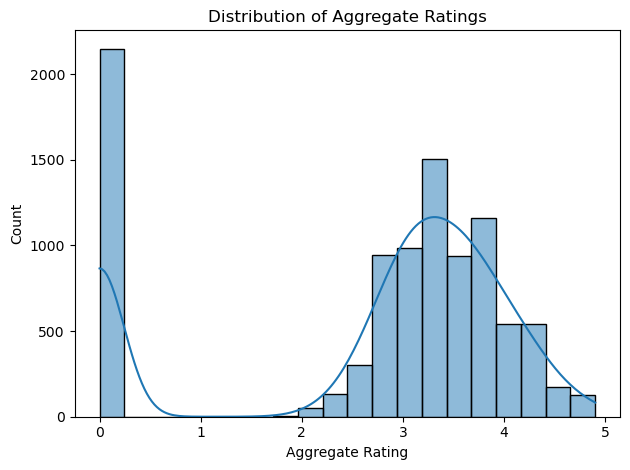

In [3]:
sns.histplot(df['Aggregate rating'],kde=True, bins=20)
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.title("Distribution of Aggregate Ratings")
plt.tight_layout()
plt.show()

Insight : Most ratings are 0, meaning customers didn’t rate those entries and 3 to 4 is most common rating range.

#### 2) Calculate the average number of votes received by restaurants

In [4]:
avg_votes = df.groupby(df['Restaurant Name'])['Votes'].mean().sort_values(ascending=False).head(20)
avg_votes

Restaurant Name
Toit                                    10934.0
Hauz Khas Social                         7931.0
Peter Cat                                7574.0
Big Brewsky                              5705.0
The Black Pearl                          5385.0
BarBQ                                    5288.0
Warehouse Cafe                           4914.0
Truffles                                 4841.0
Mocambo                                  4464.0
Gulati                                   4373.0
Ricos                                    4085.0
Joey's Pizza                             3903.5
Wenger's                                 3591.0
Downtown - Diners & Living Beer Cafe     3569.0
Glen's Bakehouse                         3533.0
Rajinder Da Dhaba                        3530.0
The All American Diner                   3495.0
The Vault Cafe                           3413.0
Exotica                                  3374.0
AB's - Absolute Barbecues                3350.0
Name: Votes, dtype: floa

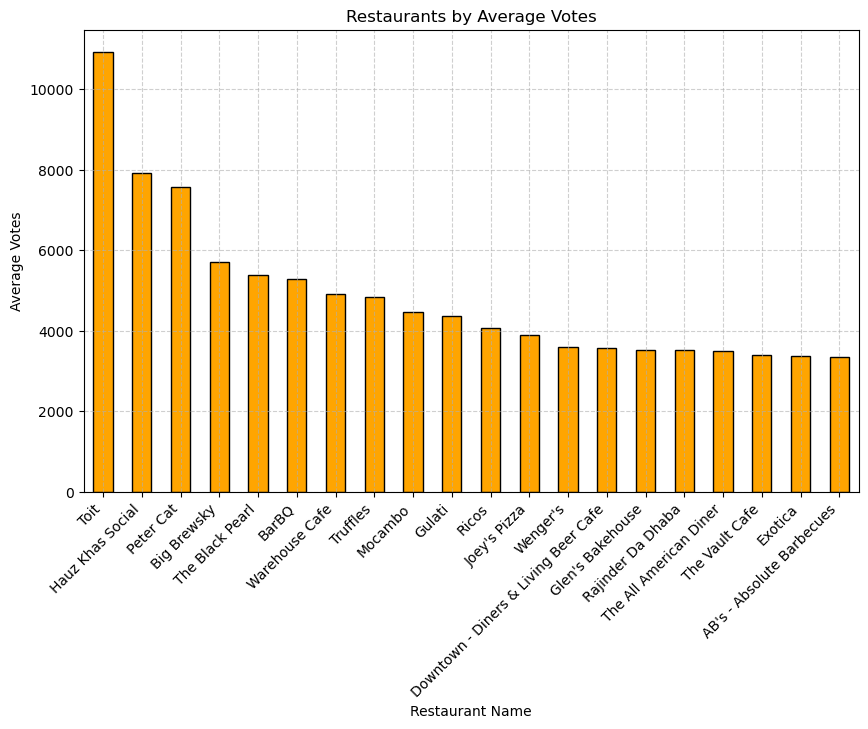

In [5]:
plt.figure(figsize=(10,6))
avg_votes.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel("Restaurant Name")
plt.ylabel("Average Votes")
plt.title("Restaurants by Average Votes")
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle="--",alpha=0.6)
plt.show()

Insight : 'Tolt' has the highest average votes, showing strong customer engagement. Other popular ones include 'Haut-Miss Social' and 'Peter Cat'.

# Task 2: Cuisine Combination
1.Identify the most common combinations of cuisines in the dataset.     
2.Determine if certain cuisine combinations tend to have higher ratings

#### 1) Identify the most common combinations of cuisines in the dataset.

In [6]:
cuisines = df['Cuisine_list'].value_counts().sort_values(ascending=False).reset_index()
combination = cuisines[cuisines['Cuisine_list'].apply(lambda x:  len(x.split(',')) > 1)]
combination_cuisine =  combination.head(10)
combination_cuisine

,Cuisine_list,count
1,"['North Indian', ' Chinese']",511
4,"['North Indian', ' Mughlai']",334
7,"['North Indian', ' Mughlai', ' Chinese']",197
8,"['Bakery', ' Desserts']",170
10,"['Pizza', ' Fast Food']",131
11,"['Chinese', ' Fast Food']",118
12,"['Mithai', ' Street Food']",116
14,"['Bakery', ' Fast Food']",108
15,"['Chinese', ' North Indian']",105
17,"['Ice Cream', ' Desserts']",83


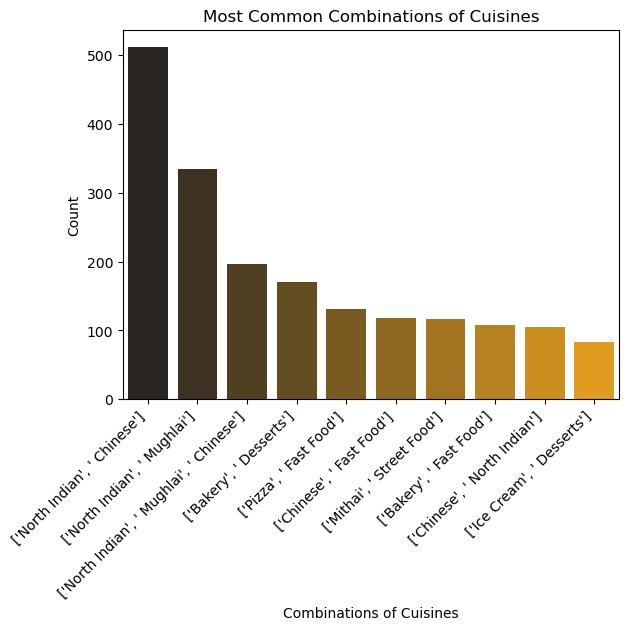

In [7]:
sns.barplot(data=combination_cuisine,x="Cuisine_list", y="count",color="orange",hue='Cuisine_list',palette='dark:orange')
plt.title('Most Common Combinations of Cuisines')
plt.xlabel('Combinations of Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

Insight: The Most common combination of cuisines is ['North Indian', ' Chinese'] and ['North Indian', ' Mughlai'] 

#### 2) Determine if certain cuisine combinations tend to have higher ratings

In [8]:
group=df[df['Cuisine_list'].apply(lambda x:  len(x.split(',')) > 1)].reset_index()
X=group.groupby('Cuisine_list')['Aggregate rating'].mean().sort_values(ascending=False).head(18).reset_index()
X


,Cuisine_list,Aggregate rating
0,"['Mexican', ' American', ' Healthy Food']",4.90
1,"['Italian', ' Deli']",4.90
2,"['European', ' Contemporary']",4.90
3,"['Sunda', ' Indonesian']",4.90
4,"['European', ' German']",4.90
5,"['Mughlai', ' Lucknowi']",4.90
6,"['American', ' Sandwich', ' Tea']",4.90
7,"['American', ' Coffee and Tea']",4.90
8,"['Hawaiian', ' Seafood']",4.90
9,"['American', ' Caribbean', ' Seafood']",4.90


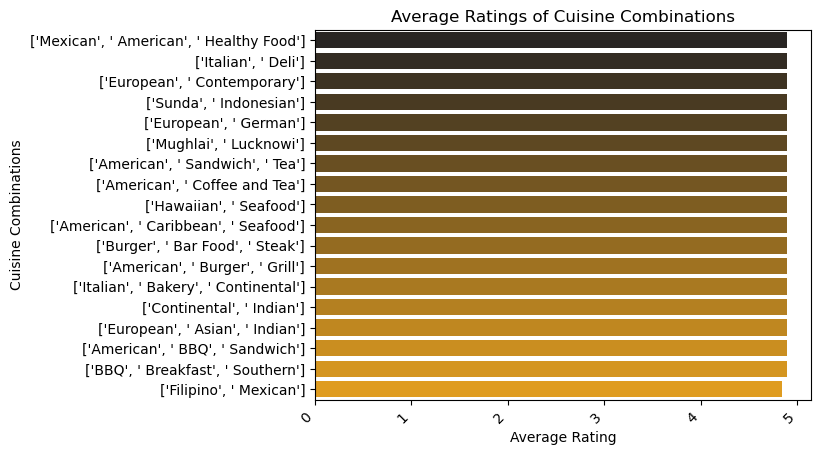

In [9]:
sns.barplot(data=X,y="Cuisine_list",  x="Aggregate rating" ,color="orange",hue='Cuisine_list',palette='dark:orange')
plt.title('Average Ratings of Cuisine Combinations')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

Insight: Cuisine combinations with Mexican, Italian, and European influences tend to get higher ratings.


# Task 3: Geographic Analysis
1.Plot the locations of restaurants on a map using longitude and latitude coordinates.      
2.Identify any patterns or clusters of restaurants in specific areas

#### 1) Plot the locations of restaurants on a map using longitude and latitude coordinates.      

In [10]:
import folium as fo
from folium.plugins import MarkerCluster as mc

center_of_latitued = df['Latitude'].mean()
center_of_longitude = df['Longitude'].mean()

center_of_map = fo.Map( location=[center_of_latitued, center_of_longitude] )

Marker_Cluster = mc().add_to(center_of_map)

for _,j in df.iterrows():
    popup_html= f" <br> {j['Restaurant Name']} </br> \
       <br>Lat: {j['Latitude']} </br>   \
       <br>Lon: {j['Longitude']} </br>"
    fo.Marker(location=[j['Latitude'],j['Longitude']], popup = popup_html).add_to(Marker_Cluster)
    
center_of_map.save("map.html")

#### 2) Identify any patterns or clusters of restaurants in specific areas

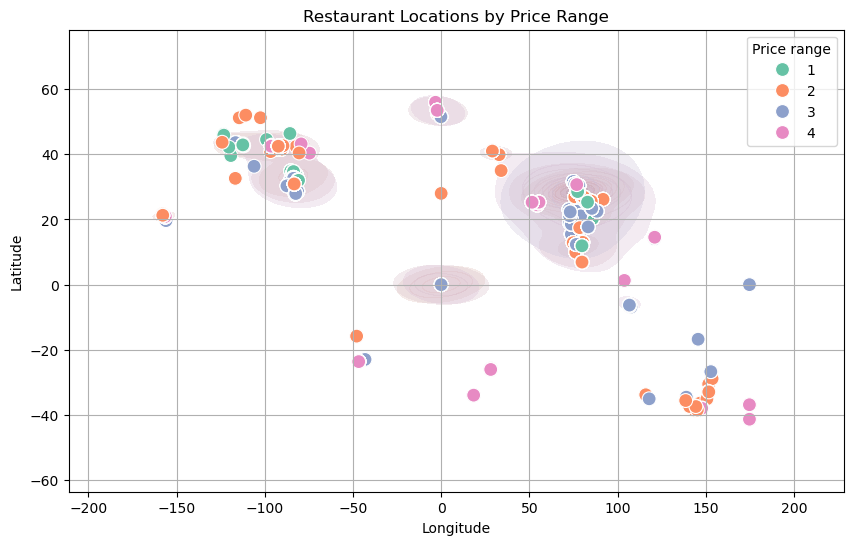

In [11]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Longitude', y='Latitude', hue='Price range', fill=True, alpha=0.3)
sns.scatterplot(data=df , x= df['Longitude'],y= df['Latitude'],hue='Price range', palette='Set2',s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Restaurant Locations by Price Range')
plt.grid(True)
plt.show()

Insight: Restaurants with all price levels usually gather in the same popular places instead of spreading out evenly.

# Task 4: Restaurant Chains
1.Identify if there are any restaurant chains present in the dataset.       
2.Analyze the ratings and popularity of different restaurant chains


#### 1) Identify if there are any restaurant chains present in the dataset.       


In [12]:
chain_count = df['Restaurant Name'].value_counts()
Restaurant_chain = chain_count[chain_count>1].index.to_list()

df['is chain'] = df['Restaurant Name'].apply(lambda x: "Yes" if x in Restaurant_chain else "No") 

chains_df = df[df['is chain'] == 'Yes']
chain_analysis=chains_df.groupby('Restaurant Name').agg( { 'Aggregate rating' : ['mean','count'] , 'Votes':'sum' } ).reset_index()
chain_analysis.columns=['Restaurant Name','Average Rating','Branch Count', 'Total Votes']

top_rating = chain_analysis.sort_values(by='Average Rating', ascending=False)
top_votes = chain_analysis.sort_values(by='Total Votes', ascending=False)
chain_analysis

,Restaurant Name,Average Rating,Branch Count,Total Votes
0,10 Downing Street,4.000000,2,670
1,221 B Baker Street,3.366667,3,215
2,34 Parkstreet Lane,3.050000,2,31
3,"34, Chowringhee Lane",2.791667,12,777
4,4700BC Popcorn,3.500000,2,176
...,...,...,...,...
729,Zaika,2.850000,4,245
730,Zaika Kathi Rolls,1.500000,2,16
731,Zizo,3.866667,3,1371
732,Zooby's Kitchen,3.150000,2,52


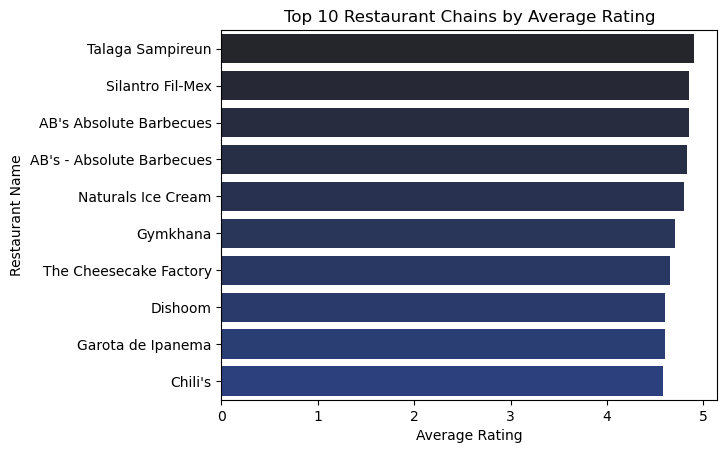

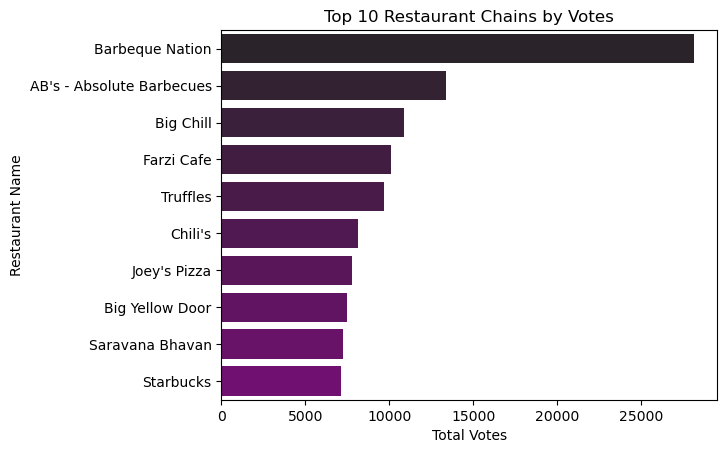

In [13]:
sns.barplot(data=top_rating.head(10), x='Average Rating', y='Restaurant Name',hue='Restaurant Name',palette='dark:#1E3A8A')
plt.title('Top 10 Restaurant Chains by Average Rating')
plt.show()

sns.barplot(data=top_votes.head(10), x='Total Votes', y='Restaurant Name',hue='Restaurant Name',palette='dark:purple')
plt.title('Top 10 Restaurant Chains by Votes')
plt.show()


Insight: Yes, there are restaurant chains in the dataset.        
Top chains like AB’s Absolute Barbecues, Naturals Ice Cream, and The Cheesecake Factory enjoy high average ratings, reflecting strong customer satisfaction.     
Chains such as Barbeque Nation, Big Chill, and Starbucks lead in total votes, showing wide popularity and customer reach.

#### 2) Analyze the ratings and popularity of different restaurant chains

In [14]:
df['popularity_score']=df['Aggregate rating'] * np.log1p(df['Votes'])


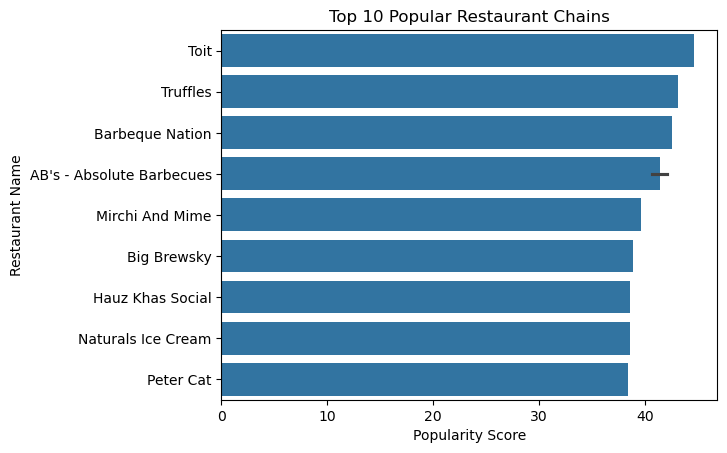

In [15]:
top_by_popularitya = df.sort_values(by='popularity_score', ascending=False).head(10)

sns.barplot(x=top_by_popularitya['popularity_score'], y=top_by_popularitya['Restaurant Name'],data=df )
plt.title("Top 10 Popular Restaurant Chains")
plt.xlabel("Popularity Score")
plt.ylabel("Restaurant Name")
plt.show()

Insight: Chains like Toit, Truffles, and Barbeque Nation are the most popular, showing strong ratings and customer preference.

In [16]:
df.to_csv('Cleaned_Dataset.csv',index=False)